### Titanic survived Project

##### Project Description

The Titanic Problem is based on the sinking of the ‘Unsinkable’ ship Titanic in early 1912. It gives you information about multiple people like their ages, sexes, sibling counts, embarkment points, and whether or not they survived the disaster. 
Based on these features, you have to predict if an arbitrary passenger on Titanic would survive the sinking or not. 


In [1]:
# importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# loading the dataset
url = "https://raw.githubusercontent.com/dsrscientist/dataset1/master/titanic_train.csv"
titanic = pd.read_csv(url)
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**This dataset contains details of titanic survivers. The "Survived" column is the target variable in which '0' is when the passenger did not survive and '1' when the passenger survived. This can be viewed as a classification task.**

In [3]:
# checking the dimensions
print(titanic.shape)


(891, 12)


In [4]:
# checking the column names
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
# summary of the dataset
print(titanic.info())
print('-'*40)
print(titanic.describe(include='all'))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
----------------------------------------
        PassengerId    Survived      Pclass             Name   Sex  \
count    891.000000  891.000000  891.000000              891   891   
unique          NaN         NaN         NaN              8

**Seven features are integers or float and five are strings(objects).**

In [6]:
# checking for null values
titanic.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

**Cabin column has the highest number of null values followed by the Age column.**

In [7]:
# checking for unique values in diferent columns
titanic.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

**Survived column has 2 unique values(0,1).
Sex column also has 2 unique values(males and females).
Pclass(1,2,3) and Embarked has 3 unique valus each.
Ticket column has the least number of unique values.**

In [8]:
# lets drop the columns that are not important
cols = ['Name','Ticket','PassengerId', 'Cabin']
titanic.drop(cols, axis = 1, inplace = True)

In [9]:
# checking the dataset after dropping columns
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [10]:
# checking for unique values in columns
titanic.nunique()

Survived      2
Pclass        3
Sex           2
Age          88
SibSp         7
Parch         7
Fare        248
Embarked      3
dtype: int64

In [11]:
# lets check for count of each unique value in these columns
print(titanic['Survived'].value_counts())
print('*'*20)
print(titanic['Sex'].value_counts())
print('*'*20)
print(titanic['Pclass'].value_counts())
print('*'*20)
print(titanic['Embarked'].value_counts())

0    549
1    342
Name: Survived, dtype: int64
********************
male      577
female    314
Name: Sex, dtype: int64
********************
3    491
1    216
2    184
Name: Pclass, dtype: int64
********************
S    644
C    168
Q     77
Name: Embarked, dtype: int64


**Out of total of 891 passengers, only 342 passengers survived.
A total of 314 female passengers were present.
491 people have 1st class tickets, 184 have 2nd class and 491 for the last class.
644 perple boarded the ship from port 'S', 168 form port 'C' and 77 from port 'Q'.**

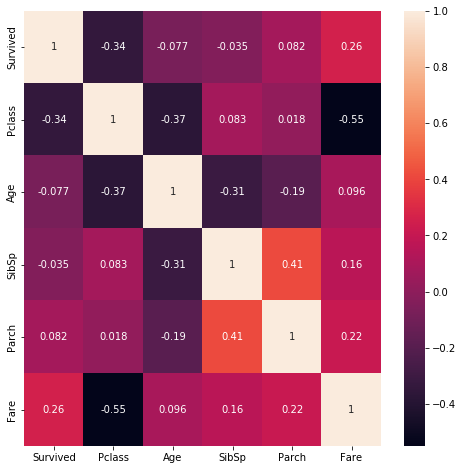

In [12]:
# lets check for coorelation between columns
plt.figure(figsize = (8,8))
sns.heatmap(titanic.corr(), annot = True)
plt.show()

In [13]:
titanic.corr()['Survived'].sort_values(ascending=False)

Survived    1.000000
Fare        0.257307
Parch       0.081629
SibSp      -0.035322
Age        -0.077221
Pclass     -0.338481
Name: Survived, dtype: float64

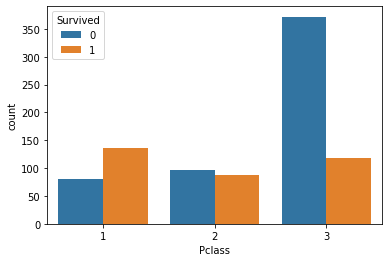

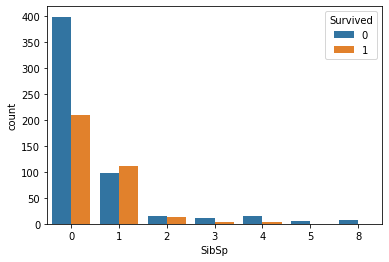

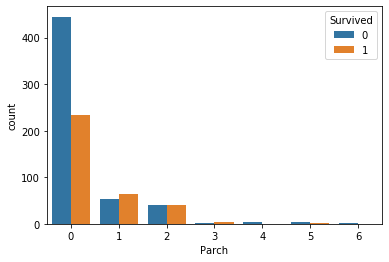

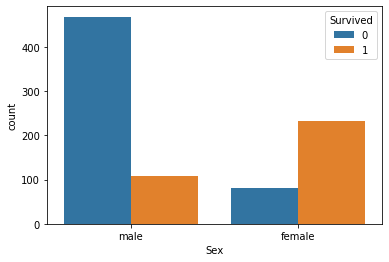

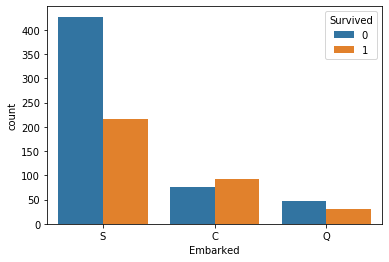

In [14]:
num = ['Pclass','SibSp','Parch','Sex', 'Embarked']
# checking the correlation between each column and the target variable
for i in num:
    sns.countplot(data=titanic, hue='Survived', x=i)
    plt.show()

**1. People with Pclass = 1 has the highest survival rate while Pclass = 3 has the lowest.**

**2. Females has a higher survival rate.**

**3. People whole boarded the sip from 'S' port have the ighest survival rate.**

<function matplotlib.pyplot.show(*args, **kw)>

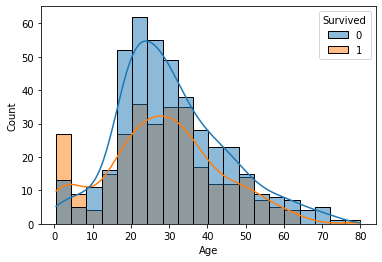

In [15]:
# visualizing age and fare columns using histograms
sns.histplot(data=titanic, x='Age', hue='Survived',kde=True)
plt.show


<function matplotlib.pyplot.show(*args, **kw)>

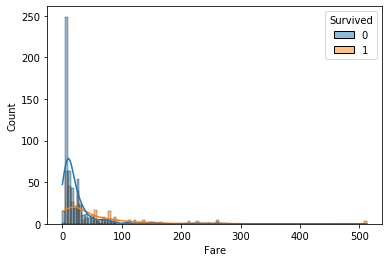

In [16]:
sns.histplot(data=titanic, x='Fare',hue='Survived', kde=True)
plt.show

In [17]:
# lets make some change to the dataset for a better understanding
titanic['Family'] = titanic['SibSp'] + titanic['Parch']
titanic.drop(['SibSp','Parch'], axis=1, inplace = True)

titanic['Sex'].replace({'male':0, 'female':1}, inplace =True)
titanic['Embarked'].replace({'S':1, 'C':2, 'Q':3}, inplace=True)

titanic.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Family
0,0,3,0,22.0,7.2500,1.0,1
1,1,1,1,38.0,71.2833,2.0,1
2,1,3,1,26.0,7.9250,1.0,0
3,1,1,1,35.0,53.1000,1.0,1
4,0,3,0,35.0,8.0500,1.0,0


In [18]:
# checking for null values
titanic.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
Fare          0
Embarked      2
Family        0
dtype: int64

In [19]:
# filling nan values
titanic['Embarked'] = titanic['Embarked'].fillna(titanic['Embarked'].mode()[0])
titanic['Age'] = titanic['Age'].fillna(round(titanic['Age'].mean()))
titanic.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Family
0,0,3,0,22.0,7.2500,1.0,1
1,1,1,1,38.0,71.2833,2.0,1
2,1,3,1,26.0,7.9250,1.0,0
3,1,1,1,35.0,53.1000,1.0,1
4,0,3,0,35.0,8.0500,1.0,0


In [20]:
titanic.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
Fare        0
Embarked    0
Family      0
dtype: int64

In [21]:
titanic['Embarked'] = titanic['Embarked'].astype(int)
titanic.dtypes

Survived      int64
Pclass        int64
Sex           int64
Age         float64
Fare        float64
Embarked      int32
Family        int64
dtype: object

In [22]:
# lets normalize the age and fare column
from sklearn.preprocessing import StandardScaler

# Z-score normalization
scaler = StandardScaler()
titanic[['Age', 'Fare']] = scaler.fit_transform(titanic[['Age', 'Fare']])

titanic.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Family
0,0,3,0,-0.597055,-0.502445,1,1
1,1,1,1,0.634162,0.786845,2,1
2,1,3,1,-0.289251,-0.488854,1,0
3,1,1,1,0.403309,0.420730,1,1
4,0,3,0,0.403309,-0.486337,1,0


In [23]:
print(titanic['Sex'].value_counts())
print('*'*20)
survival = pd.crosstab(titanic['Survived'], titanic['Sex']) # 0 for male and 1 for female
print(survival)

0    577
1    314
Name: Sex, dtype: int64
********************
Sex         0    1
Survived          
0         468   81
1         109  233


**Out of 577 males, only 109 survived whereas 233 out of 314 females survived.**

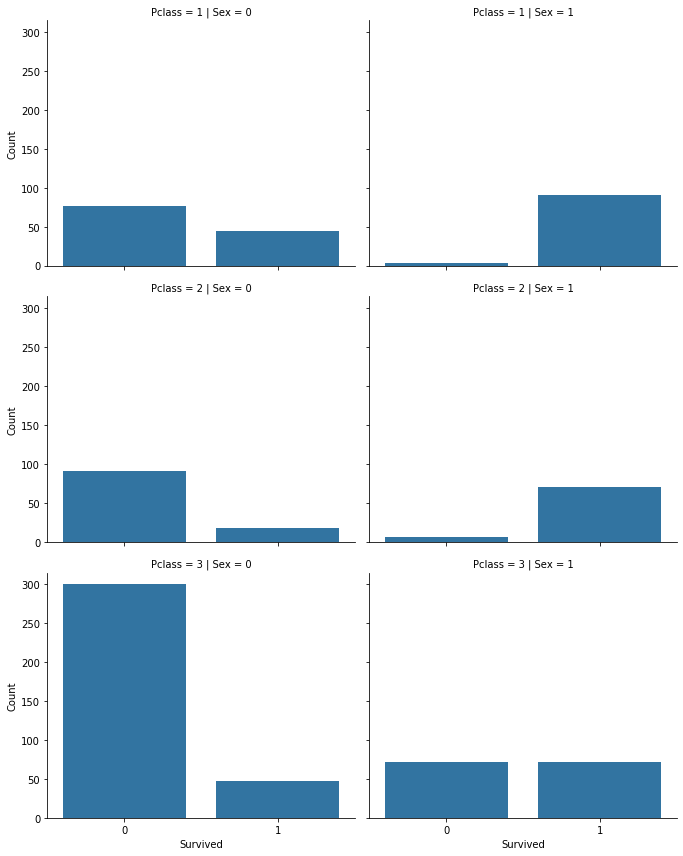

In [24]:
# Create a FacetGrid
g = sns.FacetGrid(titanic, row='Pclass', col='Sex', height=4, aspect=1.2)

# Map a countplot onto the FacetGrid
g.map(sns.countplot, 'Survived')

# Add labels and title
g.set_axis_labels('Survived', 'Count')


# Adjust subplot spacing
plt.tight_layout()

# Show the plot
plt.show()

**1. We can see that the males from passenger class 3 has the lowest survival rate as compared to males from the other two classes.**

**2. Most of the females from passenger class 1, 2 survived.**

0     537
1     161
2     102
3      29
5      22
4      15
6      12
10      7
7       6
Name: Family, dtype: int64
********************
Family     0   1   2   3   4   5   6   7   10
Survived                                     
0         374  72  43   8  12  19   8   6   7
1         163  89  59  21   3   3   4   0   0


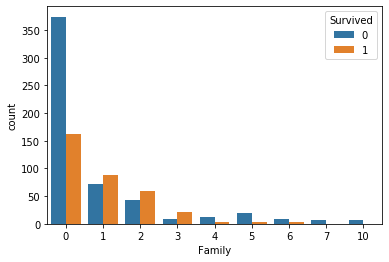

In [25]:
print(titanic['Family'].value_counts())
print('*'*20)
fam = pd.crosstab(titanic['Survived'], titanic['Family'])
print(fam)

# lets visualize the family size versus survival rate
sns.countplot(data = titanic, x='Family', hue='Survived')

__If we compare the survival rate only, passengers traveling alone has the highest survival rate.But considering the total count of each family size, passengers traveling with 1, 2, or 3 family members have a higher chance of survival.
Passengers travelling with family size greater than 6 did not survive.__

In [26]:
# lets normalize the family column also
# Z-score normalization
scaler = StandardScaler()
titanic[['Family']] = scaler.fit_transform(titanic[['Family']])
titanic.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Family
0,0,3,0,-0.597055,-0.502445,1,0.059160
1,1,1,1,0.634162,0.786845,2,0.059160
2,1,3,1,-0.289251,-0.488854,1,-0.560975
3,1,1,1,0.403309,0.420730,1,0.059160
4,0,3,0,0.403309,-0.486337,1,-0.560975


### Categorizing the data into feature and target variable

In [27]:
X = titanic.drop("Survived", axis = 1)
y = titanic['Survived']


### Dividing the data furthur into training and testing data

In [28]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.30)

# shape of train data
print('X_train: ', X_train.shape, 'y_train: ', y_train.shape)

# shape of test data
print('X_test: ', X_test.shape, 'y_test: ', y_test.shape)

X_train:  (623, 6) y_train:  (623,)
X_test:  (268, 6) y_test:  (268,)


### Using decision trees

In [29]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (confusion_matrix, classification_report,accuracy_score,f1_score,precision_score,recall_score)
from sklearn.linear_model import LogisticRegression

In [30]:
mod1 = DecisionTreeClassifier(criterion = 'gini', random_state = 42)
mod1.fit(X_train, y_train)

y_pred1 = mod1.predict(X_test)
accuracy1 = accuracy_score(y_test, y_pred1)
print(accuracy1)
print("Confusion_matrix :")
print(confusion_matrix(y_test,y_pred1))
print()
print("Classification Report :")
print(classification_report(y_test,y_pred1))
    
# Calculate the scores

print("f1 :", f1_score(y_test, y_pred1))
print("precision :", precision_score(y_test, y_pred1))
print("recall :", recall_score(y_test, y_pred1))

#calculaing cv score
cv_score = cross_val_score(mod1, X, y, cv=5)
print('cv_score :',cv_score)
print('Mean Score', cv_score.mean())

# calculating the difference between cv score and accuracy
diff1 = accuracy1-cv_score.mean()
print("Difference between CV score and Accuracy :", diff1)

0.7611940298507462
Confusion_matrix :
[[130  37]
 [ 27  74]]

Classification Report :
              precision    recall  f1-score   support

           0       0.83      0.78      0.80       167
           1       0.67      0.73      0.70       101

   micro avg       0.76      0.76      0.76       268
   macro avg       0.75      0.76      0.75       268
weighted avg       0.77      0.76      0.76       268

f1 : 0.6981132075471698
precision : 0.6666666666666666
recall : 0.7326732673267327
cv_score : [0.74301676 0.77653631 0.79775281 0.76404494 0.78531073]
Mean Score 0.7733323119795928
Difference between CV score and Accuracy : -0.0121382821288466


In [31]:
mod2 = DecisionTreeClassifier(criterion = 'entropy', random_state = 42)

mod2.fit(X_train, y_train)
y_pred2 = mod2.predict(X_test)

accuracy2 = accuracy_score(y_test, y_pred2)
print(accuracy2)
print()
print("Confusion_matrix :")
print(confusion_matrix(y_test,y_pred2))
print()
print("Classification Report :")
print(classification_report(y_test,y_pred2))
    
# Calculate the scores

print("f1 :", f1_score(y_test, y_pred2))
print("precision :", precision_score(y_test, y_pred2))
print("recall :", recall_score(y_test, y_pred2))

#calculaing cv score
cv_score = cross_val_score(mod2, X, y, cv=5)
print('cv_score :',cv_score)
print('Mean Score', cv_score.mean())

# calculating the difference between cv score and accuracy
diff2 = accuracy2-cv_score.mean()
print("Difference between CV score and Accuracy :", diff2)

0.7574626865671642

Confusion_matrix :
[[131  36]
 [ 29  72]]

Classification Report :
              precision    recall  f1-score   support

           0       0.82      0.78      0.80       167
           1       0.67      0.71      0.69       101

   micro avg       0.76      0.76      0.76       268
   macro avg       0.74      0.75      0.75       268
weighted avg       0.76      0.76      0.76       268

f1 : 0.6889952153110047
precision : 0.6666666666666666
recall : 0.7128712871287128
cv_score : [0.72625698 0.78212291 0.78651685 0.76404494 0.79661017]
Mean Score 0.7711103711024982
Difference between CV score and Accuracy : -0.013647684535334048


### Using Random Forest

In [32]:
mod3 = RandomForestClassifier(random_state = 42)
mod3.fit(X_train, y_train)
y_pred3 = mod3.predict(X_test)

accuracy3 = accuracy_score(y_test, y_pred3)
print(accuracy3)
print()
print("Confusion_matrix :")
print(confusion_matrix(y_test,y_pred3))
print()
print("Classification Report :")
print(classification_report(y_test,y_pred3))
    
# Calculate the scores

print("f1 :", f1_score(y_test, y_pred3))
print("precision :", precision_score(y_test, y_pred3))
print("recall :", recall_score(y_test, y_pred3))

#calculaing cv score
cv_score = cross_val_score(mod3, X, y, cv=5)
print('cv_score :',cv_score)
print('Mean Score', cv_score.mean())

# calculating the difference between cv score and accuracy
diff3 = accuracy3-cv_score.mean()
print("Difference between CV score and Accuracy :", diff3)

0.7798507462686567

Confusion_matrix :
[[140  27]
 [ 32  69]]

Classification Report :
              precision    recall  f1-score   support

           0       0.81      0.84      0.83       167
           1       0.72      0.68      0.70       101

   micro avg       0.78      0.78      0.78       268
   macro avg       0.77      0.76      0.76       268
weighted avg       0.78      0.78      0.78       268

f1 : 0.700507614213198
precision : 0.71875
recall : 0.6831683168316832
cv_score : [0.77653631 0.82681564 0.84831461 0.80337079 0.82485876]
Mean Score 0.8159792211255672
Difference between CV score and Accuracy : -0.03612847485691051


### Using kNN

In [33]:
mod4 = KNeighborsClassifier()
mod4.fit(X_train, y_train)
y_pred4 = mod4.predict(X_test)

accuracy4 = accuracy_score(y_test, y_pred4)
print(accuracy4)
print()
print("Confusion_matrix :")
print(confusion_matrix(y_test,y_pred4))
print()
print("Classification Report :")
print(classification_report(y_test,y_pred4))
    
# Calculate the scores

print("f1 :", f1_score(y_test, y_pred4))
print("precision :", precision_score(y_test, y_pred4))
print("recall :", recall_score(y_test, y_pred4))

#calculaing cv score
cv_score = cross_val_score(mod4, X, y, cv=5)
print('cv_score :',cv_score)
print('Mean Score', cv_score.mean())

# calculating the difference between cv score and accuracy
diff4 = accuracy4-cv_score.mean()
print("Difference between CV score and Accuracy :", diff4)

0.7947761194029851

Confusion_matrix :
[[142  25]
 [ 30  71]]

Classification Report :
              precision    recall  f1-score   support

           0       0.83      0.85      0.84       167
           1       0.74      0.70      0.72       101

   micro avg       0.79      0.79      0.79       268
   macro avg       0.78      0.78      0.78       268
weighted avg       0.79      0.79      0.79       268

f1 : 0.7208121827411168
precision : 0.7395833333333334
recall : 0.7029702970297029
cv_score : [0.77653631 0.76536313 0.8258427  0.83146067 0.79096045]
Mean Score 0.7980326528209402
Difference between CV score and Accuracy : -0.0032565334179550653


### Using Logistic Regression

In [34]:
mod5 = LogisticRegression(random_state=42)
mod5.fit(X_train, y_train)
y_pred5 = mod5.predict(X_test)

accuracy5 = accuracy_score(y_test, y_pred5)
print(accuracy5)
print()
print("Confusion_matrix :")
print(confusion_matrix(y_test,y_pred5))
print()
print("Classification Report :")
print(classification_report(y_test,y_pred5))
    
# Calculate the scores

print("f1 :", f1_score(y_test, y_pred5))
print("precision :", precision_score(y_test, y_pred5))
print("recall :", recall_score(y_test, y_pred5))

#calculaing cv score
cv_score = cross_val_score(mod5, X, y, cv=5)
print('cv_score :',cv_score)
print('Mean Score', cv_score.mean())

# calculating the difference between cv score and accuracy
diff5 = accuracy5-cv_score.mean()
print("Difference between CV score and Accuracy :", diff5)

0.7798507462686567

Confusion_matrix :
[[143  24]
 [ 35  66]]

Classification Report :
              precision    recall  f1-score   support

           0       0.80      0.86      0.83       167
           1       0.73      0.65      0.69       101

   micro avg       0.78      0.78      0.78       268
   macro avg       0.77      0.75      0.76       268
weighted avg       0.78      0.78      0.78       268

f1 : 0.6910994764397905
precision : 0.7333333333333333
recall : 0.6534653465346535
cv_score : [0.77653631 0.79329609 0.79213483 0.78089888 0.81920904]
Mean Score 0.7924150299295656
Difference between CV score and Accuracy : -0.012564283660908893


In [35]:
# lets make a list of models with their accuracy
model = ['Decision Tree_gini', 'Decision Tree_entropy', 'Random Forest', 'k Nearest Neighbors', 'Logistic Regression']
accuracy_scores = [accuracy1, accuracy2, accuracy3, accuracy4, accuracy5]
difference = [diff1, diff2, diff3, diff4, diff5]
scores = pd.DataFrame({'Models':model, 'Accuracy':accuracy_scores, 'Difference b/w CV score and Accuracy':difference})
scores

,Models,Accuracy,Difference b/w CV score and Accuracy
0,Decision Tree_gini,0.761194,-0.012138
1,Decision Tree_entropy,0.757463,-0.013648
2,Random Forest,0.779851,-0.036128
3,k Nearest Neighbors,0.794776,-0.003257
4,Logistic Regression,0.779851,-0.012564


**Since Random Forest Classifier has the highest accuracy and relatively small difference, lets use this classfier on the whole dataset and then find the overall accuracy.**

In [36]:
titanic.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Family
0,0,3,0,-0.597055,-0.502445,1,0.059160
1,1,1,1,0.634162,0.786845,2,0.059160
2,1,3,1,-0.289251,-0.488854,1,-0.560975
3,1,1,1,0.403309,0.420730,1,0.059160
4,0,3,0,0.403309,-0.486337,1,-0.560975


In [37]:
X.head()

,Pclass,Sex,Age,Fare,Embarked,Family
0,3,0,-0.597055,-0.502445,1,0.059160
1,1,1,0.634162,0.786845,2,0.059160
2,3,1,-0.289251,-0.488854,1,-0.560975
3,1,1,0.403309,0.420730,1,0.059160
4,3,0,0.403309,-0.486337,1,-0.560975


In [38]:
# HyperParameter Tuning
RF = RandomForestClassifier()

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=RF, param_grid=param_grid, cv=5)

# Fit the GridSearchCV object to the data
grid_search.fit(X, y)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Use the best estimator for predictions
best_classifier = grid_search.best_estimator_
y_p = best_classifier.predict(X)

accuracy = accuracy_score(y, y_p)
print("**Accuracy** : ",accuracy )

**Accuracy** :  0.9169472502805837


In [39]:
compare = pd.DataFrame({'Actual':y, 'Predicted':y_p})
compare.head(10)

,Actual,Predicted
0,0,0
1,1,1
2,1,1
3,1,1
4,0,0
5,0,0
6,0,0
7,0,0
8,1,1
9,1,1


In [40]:
compare.tail(10)

,Actual,Predicted
881,0,0
882,0,0
883,0,0
884,0,0
885,0,0
886,0,0
887,1,1
888,0,0
889,1,1
890,0,0
